$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 4 $$

# `01` Import Necessary Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier





----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_28648\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
X_tr = train.drop("Credit_Score",axis=1)
y_tr = train['Credit_Score']

` We want to shuffle the data because we will work depending in one row`

# Spliting and shuffle the data 

In [5]:
X_train,X_val,y_train,y_val = train_test_split(X_tr,y_tr,test_size=0.2,shuffle=True,random_state=1234)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      72040 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     67927 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70891 non-null  object 
 14  Delay_f


1- There is some of na values we will deal with it.

2- The object coulmns: Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment
Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly.

3- The Num_of_Delayed_Payment and Delay_from_due_date consider the same so we will drop one of them

4- We will drop ID, name, Customer_ID, SSN because it's a characteristics.

5- Also we will drop the column month because we didn't work by time series.



In [7]:
X_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,67927.000000,80000.000000,80000.000000,80000.000000,80000.000000,78445.000000,80000.000000,80000.000000
mean,4190.984620,17.265037,22.548125,72.517900,21.075662,27.745363,32.270396,1402.323197
std,3181.680323,118.894881,129.440226,468.031523,14.862218,193.113420,5.121102,8289.035304
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.025370,30.118977
50%,3089.424167,6.000000,5.000000,13.000000,18.000000,6.000000,32.303648,69.100853
75%,5952.307500,7.000000,7.000000,20.000000,28.000000,9.000000,36.496767,160.970391
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82256.000000


`From describe I see some negative values which isn't normal`

Checking Consistency of the coulmns : 

In [8]:

unique_Occupation = X_train['Occupation'].value_counts()
unique_Occupation

Occupation
_______          5663
Lawyer           5268
Architect        5124
Scientist        5047
Engineer         5027
Teacher          5021
Mechanic         5014
Accountant       4999
Developer        4981
Media_Manager    4955
Entrepreneur     4945
Journalist       4889
Doctor           4889
Musician         4743
Manager          4736
Writer           4699
Name: count, dtype: int64

In [9]:
unique_age = X_train['Age'].value_counts()
unique_age

Age
28      2314
38      2284
31      2254
26      2249
25      2203
        ... 
5793       1
283        1
7377       1
6141       1
4824       1
Name: count, Length: 1510, dtype: int64

In [10]:
X_train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                          1113
Personal Loan                                                                                                                          1022
Credit-Builder Loan                                                                                                                    1018
Debt Consolidation Loan                                                                                                                 996
Payday Loan                                                                                                                             979
                                                                                                                                       ... 
Personal Loan, Credit-Builder Loan, Auto Loan, Student Loan, Personal Loan, and Mortgage Loan                                             3
Debt Co

In [11]:
X_train['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
__10000__             3404
0.0                    134
87.63253757974445        1
132.5624014736247        1
54.860947640011254       1
                      ... 
56.972751538173284       1
74.11827383094474        1
186.25541676709145       1
115.04004964741137       1
314.4822747494407        1
Name: count, Length: 72856, dtype: int64

`There a lack in Consistensy in the these columns need to deal with it`

In [12]:
X_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         7960
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12073
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9109
Delay_from_due_date             0
Num_of_Delayed_Payment       5586
Changed_Credit_Limit            0
Num_Credit_Inquiries         1555
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7182
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3608
Payment_Behaviour               0
Monthly_Balance               951
dtype: int64

`there is some nulls we will deal with it.`


# `04 i` Data Preparation from Simple analysis

`~~ Let's will handle the null values and consistensy first ~~`

### Consistensy and Null Functions

In [13]:
def Occupation(df):
    imputer_occ = SimpleImputer(strategy='most_frequent')
    df['Occupation'] = df['Occupation'].replace('_______',np.nan)
    df['Occupation'] = imputer_occ.fit_transform(df[['Occupation']]).ravel()
    return imputer_occ
    


In [14]:
def age(df):
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = df['Age'].str.replace('_','')
    df['Age'] = df['Age'].replace('',np.nan)
    df['Age'] = pd.to_numeric(df['Age'])
    df.loc[(df['Age'] < 0) | (df['Age'] > 70), 'Age'] = np.nan
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    return age_imputer

In [15]:
def invested_monthly(df):
    invested_monthly_imputer = KNNImputer(n_neighbors=5)
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('__','')
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('',np.nan)
    df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])
    df['Amount_invested_monthly'] = invested_monthly_imputer.fit_transform(df[['Amount_invested_monthly']])
    return invested_monthly_imputer

Null columns: 

In [16]:
def monthly_inhand(df):
    monthly_inhand_imputer = KNNImputer(n_neighbors=3)
    df['Monthly_Inhand_Salary'] = monthly_inhand_imputer.fit_transform(df[['Monthly_Inhand_Salary']])
    return monthly_inhand_imputer


In [17]:
def num_credit(df):
    num_credit_imputer = KNNImputer(n_neighbors=3)
    df['Num_Credit_Inquiries'] = num_credit_imputer.fit_transform(df[['Num_Credit_Inquiries']])
    return num_credit_imputer


In [18]:
def credit_his(df):
    credit_his_imputer = KNNImputer(n_neighbors=3)
    df['Credit_History_Age'] = df['Credit_History_Age'].str.split().str[0].astype(float)
    df['Credit_History_Age'] = credit_his_imputer.fit_transform(df[['Credit_History_Age']])
    return credit_his_imputer


### Object Coulmns

In [19]:
def annual_income(df):
    df['Annual_Income'] = df['Annual_Income'].str.replace("_","")
    df['Annual_Income'] = pd.to_numeric(df['Annual_Income'])



In [20]:
def num_loan(df):
    df['Num_of_Loan'] = df['Num_of_Loan'].str.replace("_","")
    df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])
    df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x:x * -1 if x<0 else x )


In [21]:
def changed_credit(df):
    df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace("_","0.0")
    df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'])



In [22]:
def outstanding_Debt(df):
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace("_","")
    df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'])



In [23]:
def Credit_Mix(df):
    
    df['Credit_Mix'] = df['Credit_Mix'].str.replace("_","Standard")
    map_credit = {'Good':2,
                  'Standard':1,
                  'Bad':0
                  }
    df['Credit_Mix'] = df['Credit_Mix'].map(map_credit)



In [24]:
def Payment(df):
    map_payment = {"Yes":2,"No":1,"NM":0}
    df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(map_payment)


In [25]:

def Occupation_enc_train(df):
    enc = LabelEncoder()
    df['Occupation'] = enc.fit_transform(df['Occupation'])
    return enc


### Calling Functions 

In [26]:
occ_imp = Occupation(X_train)
age_imp = age(X_train)
invested_monthly_imp = invested_monthly(X_train)
monthly_inhand_imp = monthly_inhand(X_train)
num_credit_imp = num_credit(X_train)
credit_his_imp = credit_his(X_train)
annual_income(X_train)
num_loan(X_train)
changed_credit(X_train)
outstanding_Debt(X_train)
Credit_Mix(X_train)
Payment(X_train)
encode_occ = Occupation_enc_train(X_train)


### The Drop Coulmns 

In [27]:

X_train = X_train.drop(["Month","ID","Name","Customer_ID","SSN","Type_of_Loan","Num_of_Delayed_Payment","Monthly_Balance","Payment_Behaviour"],axis=1)


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80000 non-null  float64
 1   Occupation                80000 non-null  int32  
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  int64  
 9   Changed_Credit_Limit      80000 non-null  float64
 10  Num_Credit_Inquiries      80000 non-null  float64
 11  Credit_Mix                80000 non-null  int64  
 12  Outstanding_Debt          80000 non-null  float64
 13  Credit_Utilization_Ratio  80000 non-null  float64
 14  Credit_

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

In [29]:
columns_to_visualize = ['Age', 'Monthly_Inhand_Salary', 'Annual_Income', 'Changed_Credit_Limit',
                       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                       'Amount_invested_monthly']
vis = X_train[columns_to_visualize]

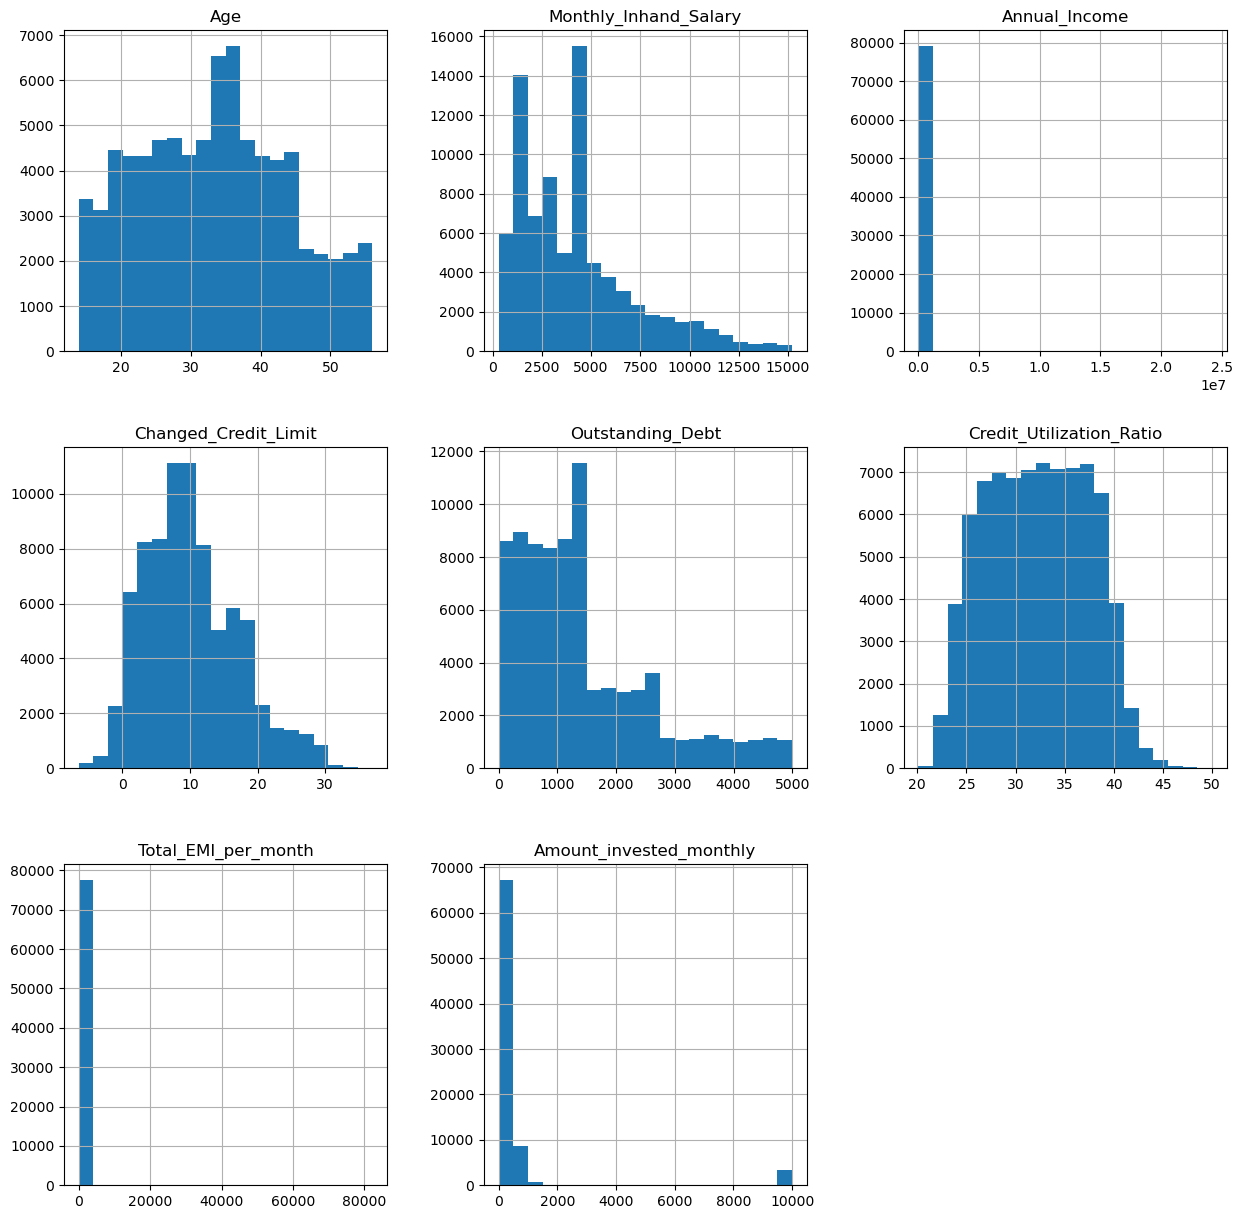

In [30]:
vis.hist(bins=20,figsize=(15,15));

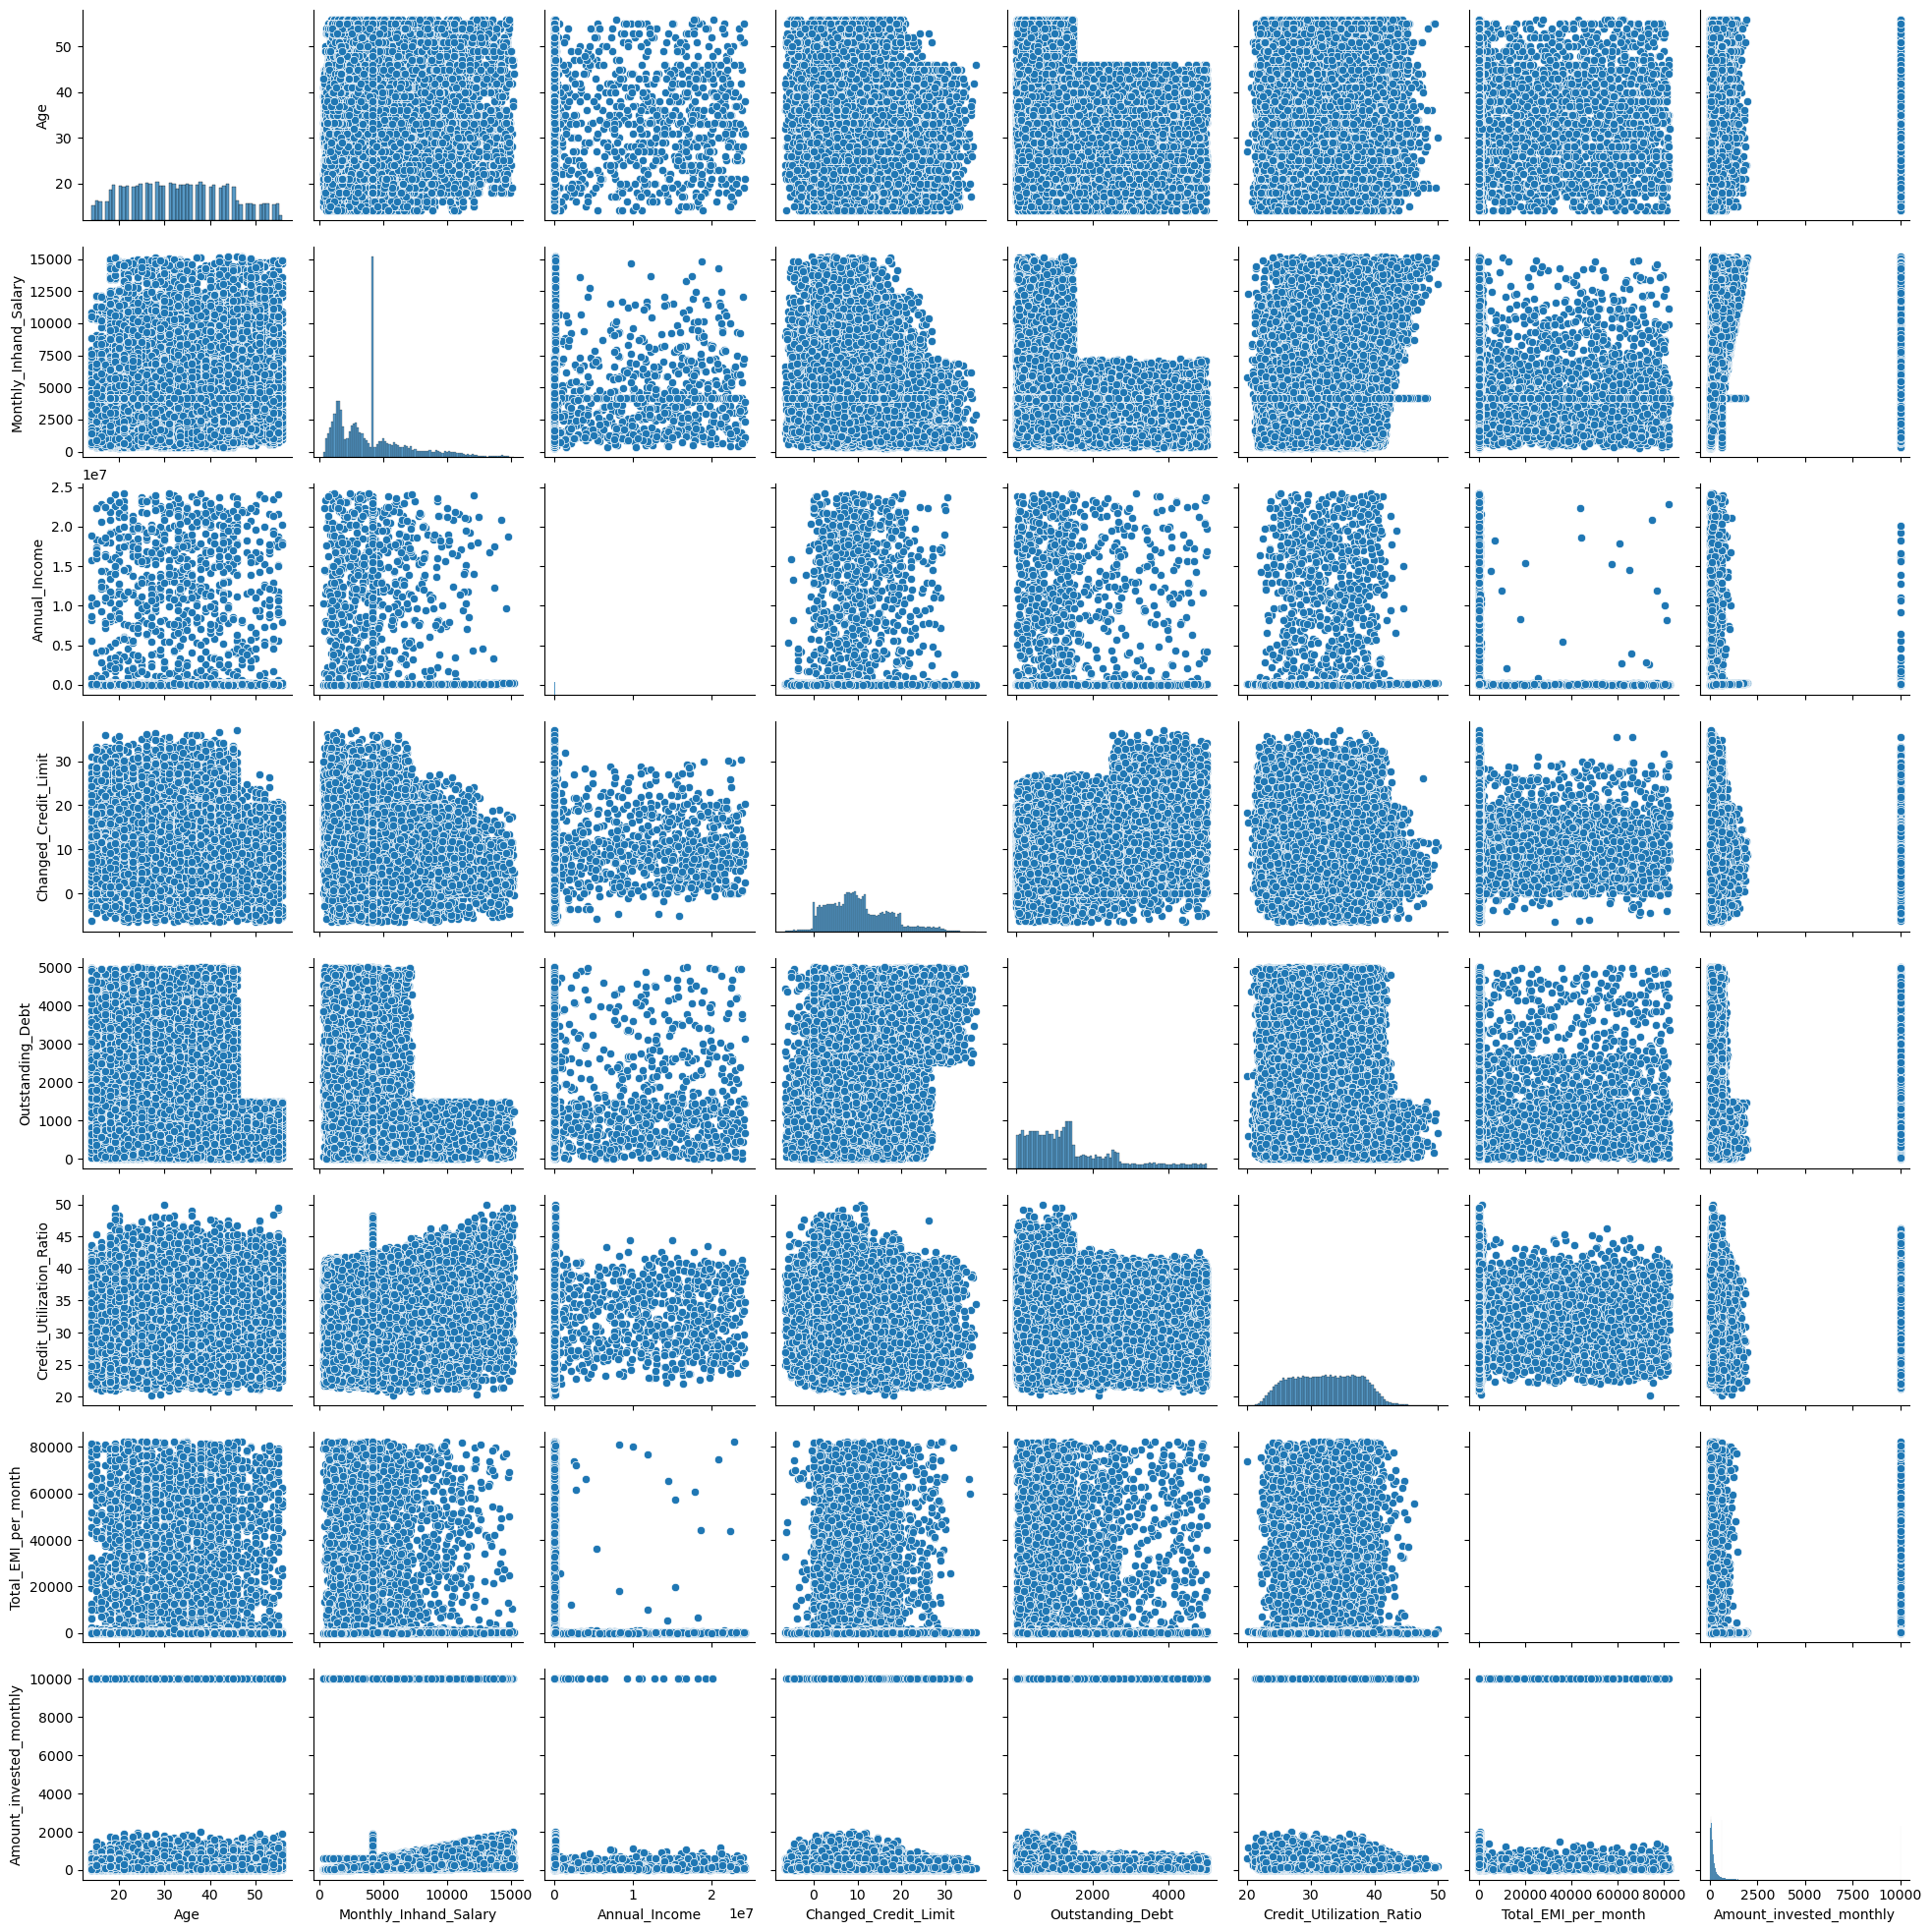

In [31]:
sns.pairplot(vis)

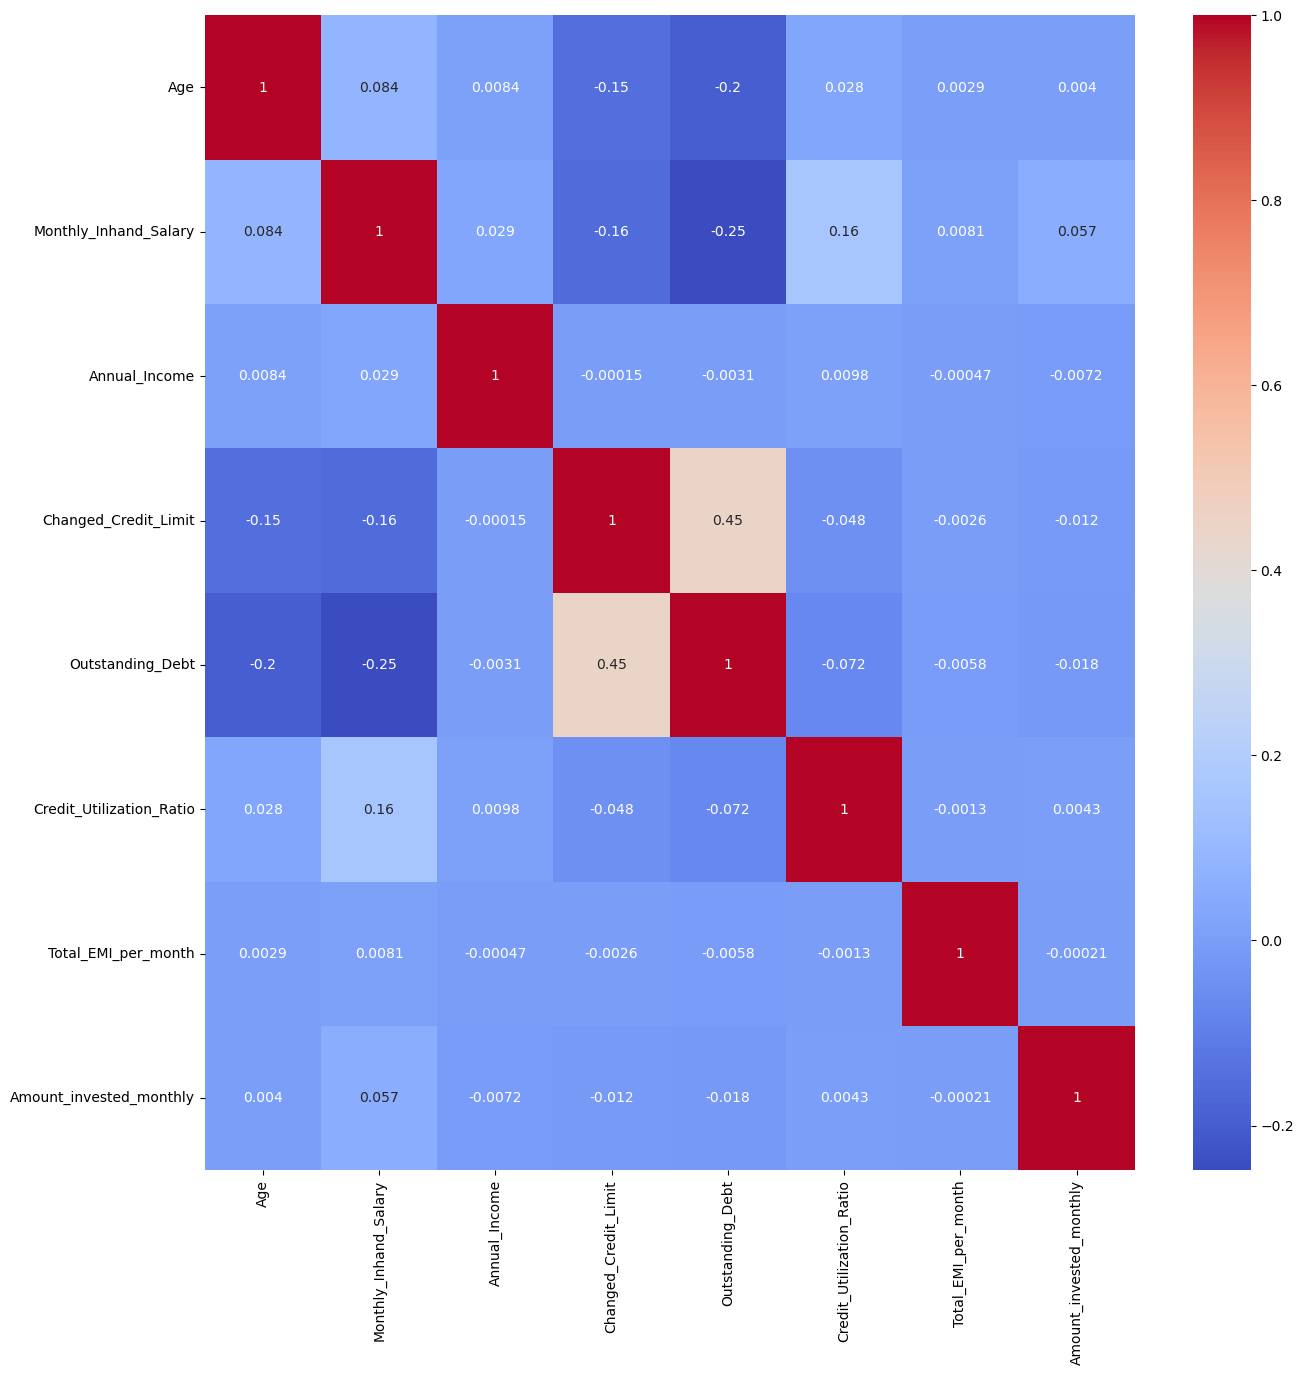

In [32]:
corr = vis.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm');

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.72594107,  0.97117803, -0.07441455, ...,  0.86215405,
        -0.15797292, -0.27420173],
       [ 1.95141731, -1.67309404, -0.10290494, ..., -0.57737852,
        -0.16718286, -0.30203691],
       [-1.34794178,  1.69234314, -0.10161676, ...,  0.86215405,
        -0.1465678 , -0.27657247],
       ...,
       [-0.87660477, -0.95192893, -0.091696  , ...,  0.86215405,
        -0.12630936, -0.23347747],
       [ 1.00874328,  0.00962455, -0.11146467, ..., -0.57737852,
        -0.16784451, -0.24633867],
       [ 1.95141731,  0.00962455, -0.04448589, ..., -2.0169111 ,
        -0.15384889, -0.15997789]])

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

modify some functions

In [34]:
def Occupation_test(df,imp):
    df['Occupation'] = df['Occupation'].replace('_______',np.nan)
    df['Occupation'] = imp.transform(df[['Occupation']]).ravel()
    

In [35]:
def age_test(df,imp):
    df['Age'] = df['Age'].str.replace('_','')
    df['Age'] = df['Age'].replace('',np.nan)
    df['Age'] = pd.to_numeric(df['Age'])
    df.loc[(df['Age'] < 0) | (df['Age'] > 70), 'Age'] = np.nan
    df['Age'] = imp.transform(df[['Age']])
    

In [36]:
def invested_monthly_test(df,imp):
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('__','')
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('',np.nan)
    df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'])
    df['Amount_invested_monthly'] = imp.transform(df[['Amount_invested_monthly']])
    

In [37]:
def monthly_inhand_test(df,imp):
    df['Monthly_Inhand_Salary'] = imp.transform(df[['Monthly_Inhand_Salary']])


In [38]:
def num_credit_test(df,imp):
    df['Num_Credit_Inquiries'] = imp.transform(df[['Num_Credit_Inquiries']])
    


In [39]:
def credit_his_test(df,imp):
    df['Credit_History_Age'] = df['Credit_History_Age'].str.split().str[0].astype(float)
    df['Credit_History_Age'] = imp.transform(df[['Credit_History_Age']])
    


In [40]:

def Occupation_enc_test(df,enc):
    df['Occupation'] = enc.transform(df['Occupation'])
   


### On Val Data

In [41]:
Occupation_test(X_val,occ_imp)
age_test(X_val,age_imp)
invested_monthly_test(X_val,invested_monthly_imp)
monthly_inhand_test(X_val,monthly_inhand_imp)
num_credit_test(X_val,num_credit_imp)
credit_his_test(X_val,credit_his_imp)
Occupation_enc_test(X_val,encode_occ)

annual_income(X_val)
num_loan(X_val)
changed_credit(X_val)
outstanding_Debt(X_val)
Credit_Mix(X_val)
Payment(X_val)


In [42]:

X_val = X_val.drop(["Month","ID","Name","Customer_ID","SSN","Type_of_Loan","Num_of_Delayed_Payment","Monthly_Balance","Payment_Behaviour"],axis=1)


In [43]:
X_val = scaler.transform(X_val)


### On Test Data

In [44]:
X_test = test


In [45]:
Occupation_test(X_test,occ_imp)
age_test(X_test,age_imp)
invested_monthly_test(X_test,invested_monthly_imp)
monthly_inhand_test(X_test,monthly_inhand_imp)
num_credit_test(X_test,num_credit_imp)
credit_his_test(X_test,credit_his_imp)
Occupation_enc_test(X_test,encode_occ)

annual_income(X_test)
num_loan(X_test)
changed_credit(X_test)
outstanding_Debt(X_test)
Credit_Mix(X_test)
Payment(X_test)


In [46]:
X_test = X_test.drop(["Month","ID","Name","Customer_ID","SSN","Type_of_Loan","Num_of_Delayed_Payment","Monthly_Balance","Payment_Behaviour"],axis=1)


In [47]:
X_test = scaler.transform(X_test)


----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [48]:
# svc = LinearSVC(random_state=1234)

In [49]:
# svc.fit(X_train, y_train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [50]:
# svc.score(X_val, y_val)

In [51]:
# print(classification_report(y_val, svc.predict(X_val)))

----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [52]:
# svc = SVC(kernel='linear',random_state=1234)

In [53]:
# svc.fit(X_train, y_train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

In [54]:
# svc.score(X_val, y_val)

In [55]:
# print(classification_report(y_val, svc.predict(X_val)))

## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [56]:
# svm_poly = SVC(kernel='poly', C=1, degree=3)
# svm_rbf = SVC(kernel='rbf', C=1)

In [57]:
# svm_poly.fit(X_train, y_train)

In [58]:
# svm_poly.score(X_val, y_val)

In [59]:
# print(classification_report(y_val, svm_poly.predict(X_val)))

In [60]:
# svm_rbf.fit(X_train, y_train)

In [61]:
# svm_rbf.score(X_val, y_val)

In [62]:
# print(classification_report(y_val, svm_poly.predict(X_val)))

### The Trees models 

In [63]:
# dt = DecisionTreeClassifier()

In [64]:
# param_grid = {
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy']
# }
# clf = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# clf.fit(X_train, y_train)

In [65]:
# best_model = clf.best_estimator_
# best_model.score(X_val,y_val)

In [66]:
# print(classification_report(y_val, best_model.predict(X_val)))

### Random Forest 

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 200 ,max_depth = 20,random_state=1234)

In [ ]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=1234)

In [ ]:
random_forest.score(X_val, y_val)

0.77395

In [ ]:
print(classification_report(y_val, random_forest.predict(X_val)))

              precision    recall  f1-score   support

        Good       0.71      0.70      0.70      3632
        Poor       0.77      0.79      0.78      5759
    Standard       0.80      0.79      0.80     10609

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



### XGboost

In [73]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=1234
)

In [75]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)


In [77]:
xgb.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
xgb.score(X_val, y_val_encoded)

0.78495

In [80]:
print(classification_report(y_val_encoded, xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      3632
           1       0.77      0.80      0.79      5759
           2       0.80      0.80      0.80     10609

    accuracy                           0.78     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
y_te_pred = xgb.predict(X_test)